In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('results.csv')

In [3]:
data

,model,train_dataset,test_f1,test_precision,test_recall,test_corrected_f1,test_corrected_precision,test_corrected_recall
0,bond-auto-distant,conll03+0.0gold,0.773971,0.818685,0.733888,0.782116,0.831423,0.738329
1,bond-auto-distant,conll03+0.0gold,0.799129,0.786854,0.811792,0.810970,0.802198,0.819937
2,bond-gold10-distant,conll03+0.1gold,0.846589,0.833305,0.860305,0.860639,0.851184,0.870305
3,bond-gold10-distant,conll03+0.1gold,0.860012,0.848527,0.871813,0.873445,0.865839,0.881186
4,bond-gold15-distant,conll03+0.15gold,0.873977,0.859466,0.888987,0.887213,0.876649,0.898034
...,...,...,...,...,...,...,...,...
197,supervised-coreg-gold30,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
198,supervised-coreg-gold30,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
199,supervised-coreg-gold30,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
200,supervised-coreg-gold30,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
data['gold'] = 0
data['gold'][data['train_dataset'] == 'conll03+0.0gold'] = 0
data['gold'][data['train_dataset'] == 'conll03+0.05gold'] = 0.05
data['gold'][data['train_dataset'] == 'conll03+0.1gold'] = 0.1
data['gold'][data['train_dataset'] == 'conll03+0.15gold'] =  0.15
data['gold'][data['train_dataset'] == 'conll03+0.2gold'] = 0.2
data['gold'][data['train_dataset'] == 'conll03+0.3gold'] = 0.3
data['gold'][data['train_dataset'] == 'conll03+0.4gold'] = 0.4
data['gold'][data['train_dataset'] == 'conll03+0.5gold'] =  0.5

data['markup'] = 'None'

data['markup'][data['model'] == 'bond-auto-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold5-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold10-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold15-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold20-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold30-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold40-distant'] = 'distant'
data['markup'][data['model'] == 'bond-gold50-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-auto-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold5-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold10-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold15-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold20-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold30-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold40-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-gold50-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-auto-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold5-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold10-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold15-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold20-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold30-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold40-distant'] = 'distant'
data['markup'][data['model'] == 'supervised-coreg-gold50-distant'] = 'distant'

data['model'][data['model'] == 'bond-auto'] = 'bond'
data['model'][data['model'] == 'bond-gold5'] = 'bond'
data['model'][data['model'] == 'bond-gold10'] = 'bond'
data['model'][data['model'] == 'bond-gold15'] = 'bond'
data['model'][data['model'] == 'bond-gold20'] = 'bond'
data['model'][data['model'] == 'bond-gold30'] = 'bond'
data['model'][data['model'] == 'bond-gold40'] = 'bond'
data['model'][data['model'] == 'bond-gold50'] = 'bond'
data['model'][data['model'] == 'supervised-auto'] = 'supervised'
data['model'][data['model'] == 'supervised-gold5'] = 'supervised'
data['model'][data['model'] == 'supervised-gold10'] = 'supervised'
data['model'][data['model'] == 'supervised-gold15'] = 'supervised'
data['model'][data['model'] == 'supervised-gold20'] = 'supervised'
data['model'][data['model'] == 'supervised-gold30'] = 'supervised'
data['model'][data['model'] == 'supervised-gold40'] = 'supervised'
data['model'][data['model'] == 'supervised-gold50'] = 'supervised'
data['model'][data['model'] == 'supervised-coreg-auto'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold5'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold10'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold15'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold20'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold30'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold40'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold50'] = 'coregularized'

data['model'][data['model'] == 'bond-auto-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold5-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold10-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold15-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold20-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold30-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold40-distant'] = 'bond'
data['model'][data['model'] == 'bond-gold50-distant'] = 'bond'
data['model'][data['model'] == 'supervised-auto-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold5-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold10-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold15-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold20-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold30-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold40-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-gold50-distant'] = 'supervised'
data['model'][data['model'] == 'supervised-coreg-auto-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold5-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold10-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold15-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold20-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold30-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold40-distant'] = 'coregularized'
data['model'][data['model'] == 'supervised-coreg-gold50-distant'] = 'coregularized'

/tmp/ipykernel_76589/4169096845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gold'][data['train_dataset'] == 'conll03+0.0gold'] = 0
/tmp/ipykernel_76589/4169096845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gold'][data['train_dataset'] == 'conll03+0.05gold'] = 0.05
/tmp/ipykernel_76589/4169096845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['markup'][data['model'] == 'bond-auto-distant'] = 'dist

In [5]:
data

,model,train_dataset,test_f1,test_precision,test_recall,test_corrected_f1,test_corrected_precision,test_corrected_recall,gold,markup
0,bond,conll03+0.0gold,0.773971,0.818685,0.733888,0.782116,0.831423,0.738329,0.00,distant
1,bond,conll03+0.0gold,0.799129,0.786854,0.811792,0.810970,0.802198,0.819937,0.00,distant
2,bond,conll03+0.1gold,0.846589,0.833305,0.860305,0.860639,0.851184,0.870305,0.10,distant
3,bond,conll03+0.1gold,0.860012,0.848527,0.871813,0.873445,0.865839,0.881186,0.10,distant
4,bond,conll03+0.15gold,0.873977,0.859466,0.888987,0.887213,0.876649,0.898034,0.15,distant
...,...,...,...,...,...,...,...,...,...,...
197,coregularized,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,None
198,coregularized,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,None
199,coregularized,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,None
200,coregularized,conll03+0.3gold,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30,None


In [6]:
grouped = data.drop('train_dataset', axis=1).groupby(['markup', 'model'])

In [7]:
stats = data.drop('train_dataset', axis=1).groupby(['markup', 'model', 'gold']).aggregate(['mean', 'median', 'std', 'count'])

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
stats

test_f1                           test_precision  \
                                mean    median       std count           mean   
markup  model         gold                                                      
None    bond          0.05  0.249778  0.248457  0.200610     5       0.767215   
                      0.10  0.797901  0.830084  0.074022     5       0.814148   
                      0.15  0.866766  0.868812  0.005051     5       0.862173   
                      0.20  0.867218  0.872002  0.010991     5       0.851779   
                      0.30  0.886157  0.887778  0.004515     5       0.875635   
                      0.40  0.881577  0.888637  0.011219     5       0.864656   
                      0.50  0.897704  0.897413  0.001690     5       0.886592   
        coregularized 0.05  0.000000  0.000000  0.000000     5       0.000000   
                      0.10  0.000000  0.000000  0.000000     5       0.000000   
                      0.15  0.000000  0.000000  0.000000     5       0.000000   
                      0.30  0.000000  0.000000  0.000000     5       0.000000   
                      0.50  0.868763  0.870965  0.008712     5       0.950552   
        supervised    0.05  0.000000  0.000000  0.000000     5       0.000000   
                      0.10  0.000000  0.000000  0.000000     5       0.000000   
                      0.15  0.000000  0.000000  0.000000     5       0.000000   
                      0.30  0.096177  0.114760  0.037506     5       0.844723   
                      0.50  0.893230  0.894814  0.004982     5       0.931466   
distant bond          0.00  0.786010  0.791390  0.012510     5       0.795458   
                      0.05  0.818797  0.819836  0.014058     5       0.811000   
                      0.10  0.846187  0.857568  0.023478     5       0.835844   
                      0.15  0.868357  0.871930  0.008172     5       0.856466   
                      0.20  0.872857  0.874989  0.005278     5       0.857839   
                      0.30  0.865927  0.881950  0.026127     5       0.844078   
                      0.40  0.880105  0.884705  0.010197     5       0.861352   
                      0.50  0.894994  0.894489  0.005754     5       0.882729   
        coregularized 0.00  0.771615  0.771714  0.002359     5       0.895032   
                      0.05  0.775759  0.775846  0.002037     5       0.894522   
                      0.10  0.784116  0.783421  0.003510     5       0.896912   
                      0.15  0.794820  0.795942  0.004143     5       0.897233   
                      0.20  0.809961  0.810716  0.005468     5       0.893404   
                      0.30  0.855661  0.855514  0.001073     5       0.907497   
                      0.40  0.888778  0.888118  0.001736     5       0.918319   
                      0.50  0.897605  0.896459  0.003122     5       0.915402   
        supervised    0.00  0.714080  0.712614  0.004352     5       0.812979   
                      0.05  0.725086  0.722709  0.005243     5       0.818902   
                      0.10  0.741817  0.739823  0.004117     5       0.831313   
                      0.15  0.759961  0.761526  0.004575     3       0.842682   
                      0.20  0.772618  0.773315  0.006559     5       0.848824   
                      0.30  0.807059  0.806720  0.007053     5       0.864755   
                      0.40  0.844123  0.844420  0.007585     5       0.877177   
                      0.50  0.879975  0.879423  0.004145     4       0.892707   

                                                     test_recall            \
                              median       std count        mean    median   
markup  model         gold                                                   
None    bond          0.05  0.955935  0.413084     5    0.158322  0.142528   
                      0.10  0.838634  0.075297     5    0.782472  0.809136   
                      0.15  0.865375  0.009467     5    0.871459  0.870042

In [68]:
distant_data = data[data['markup'] == 'distant']
normal_data = data[data['markup'] == 'None']
bond_data = data[data['model'] == 'bond']

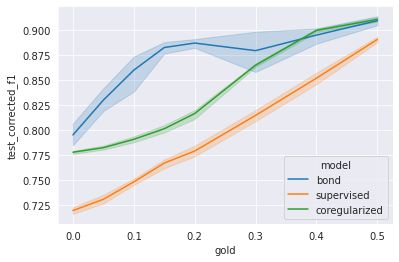

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=distant_data, x='gold', y='test_corrected_f1', hue='model')
plt.savefig('experiments/plots/distant_f1.png')

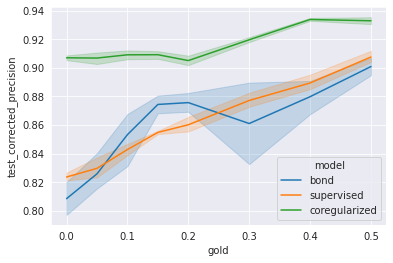

In [70]:
sns.lineplot(data=distant_data, x='gold', y='test_corrected_precision', hue='model')
plt.savefig('experiments/plots/distant_precision.png')

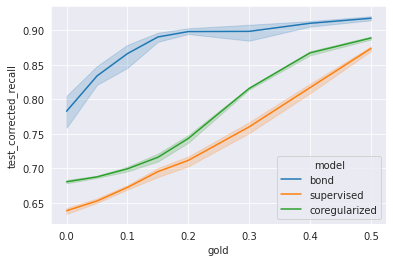

In [71]:
sns.lineplot(data=distant_data, x='gold', y='test_corrected_recall', hue='model')
plt.savefig('experiments/plots/distant_recall.png')

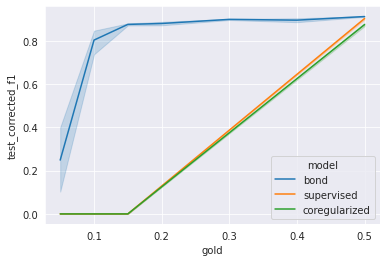

In [72]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_f1', hue='model')
plt.savefig('experiments/plots/normal_f1.png')

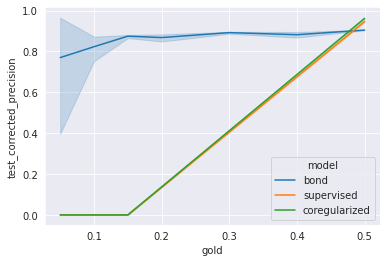

In [73]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_precision', hue='model')
plt.savefig('experiments/plots/normal_precision.png')

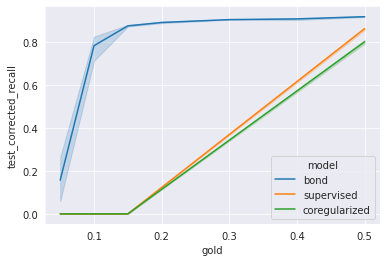

In [74]:
sns.lineplot(data=normal_data, x='gold', y='test_corrected_recall', hue='model')
plt.savefig('experiments/plots/normal_recall.png')

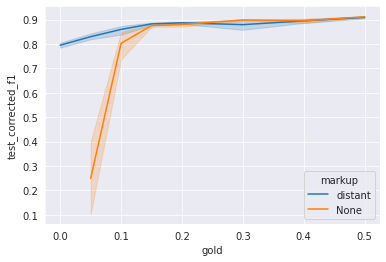

In [75]:
sns.lineplot(data=bond_data, x='gold', y='test_corrected_f1', hue='markup')
plt.savefig('experiments/plots/bond_f1.png')

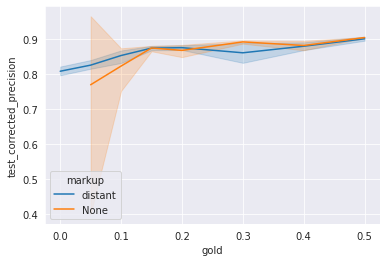

In [76]:
sns.lineplot(data=bond_data, x='gold', y='test_corrected_precision', hue='markup')
plt.savefig('experiments/plots/bond_precision.png')

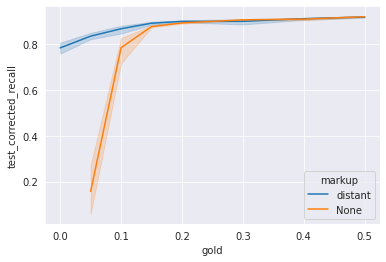

In [77]:
sns.lineplot(data=bond_data, x='gold', y='test_corrected_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png')

In [78]:
grouped.groups

{('None', 'bond'): [10, 11, 12, 13, 14, 15, 16, 17, 67, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162], ('None', 'coregularized'): [46, 47, 48, 49, 50, 51, 52, 53, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], ('None', 'supervised'): [38, 39, 40, 41, 42, 43, 44, 45, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120], ('distant', 'bond'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], ('distant', 'coregularized'): [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 110, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], ('distant', 'supervised'): [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 77, 78, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 1